# Обзор матричной алгебры

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

### Поэлементные операции с массивами

In [3]:
x + y

array([5, 7, 9])

In [4]:
x * y

array([ 4, 10, 18])

In [5]:
x - y

array([-3, -3, -3])

In [6]:
 x / y

array([0.25, 0.4 , 0.5 ])

In [7]:
x ** y

array([  1,  32, 729], dtype=int32)

In [8]:
y % x

array([0, 1, 0], dtype=int32)

### Изменение размерности

In [9]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# 10 - количество строк (сначала всегда идет количество строк, потом количество столбцов, т.е (10,)- 
# oзначает 10 строк, один столбец)
x.shape

(10,)

In [14]:
np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).shape

(3, 2)

In [15]:
# первый аргумент - количество строк
# второй - количество столбцов

x.reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [16]:
# при "неправильном" количестве строк и столбцов будет ошибка

x.reshape( 5, 3 )

ValueError: cannot reshape array of size 10 into shape (5,3)

In [17]:
d = {'a': 1}

In [19]:
d['b']

KeyError: 'b'

In [22]:
# Если нужно, чтобы скрипт не вылетал с ошибкой, то можно так
try:
    x.reshape(5, 3)
    x += '1'

except ValueError:
    print('Попались кривые данные, идём дальше')

except Exception as err:
    print('Неизвестная ошибка. Останавливаю выполнение')
    raise err

Попались кривые данные, идём дальше


In [23]:
# транспонирование матриц

np.array(
    [
        [1, 2],
        [3, 4],
        [5, 6]
    ]
).T

array([[1, 3, 5],
       [2, 4, 6]])

In [24]:
# склеивание листов

x = np.array([ [1, 2, 3], [4, 5, 6] ])

In [25]:
x.ravel()

array([1, 2, 3, 4, 5, 6])

In [26]:
x = np.array( [ [1, 2, 3], [4, 5, 6] ] )

In [27]:
# или можно так
x.reshape(6)

array([1, 2, 3, 4, 5, 6])

In [32]:
x = np.array( [ [1, 2, 3], [4, 5, 6] ] )

In [33]:
# результат разный, если добавить 1 в качестве количества строк

x.reshape( 1, 6 )[0]

array([1, 2, 3, 4, 5, 6])

In [34]:
x

array([[1, 2, 3],
       [4, 5, 6]])

### Скаляроное произведение векторов

\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = |\vec{a}| \space |\vec{b}| \space cos(\vec{a}, \vec{b})
\end{equation*}

Пусть 
\begin{equation*}
\LARGE
\vec{a} = (a_1, a_2, a_3) \\
\LARGE
\vec{b} = (b_1, b_2, b_3)
\end{equation*}

Тогда скалярное произведение векторов равно
\begin{equation*}
\LARGE
\vec{a} \dot{} \vec{b} = a_1 b_1 + a_2 b_2 + a_3 b_3
\end{equation*}

In [38]:
a = np.array([4, 3])
b = np.array([2, 1])

In [39]:
np.dot(a, b)

11

Можно посчитать и таким образом

In [42]:
# первый шаг

for pair in zip(a, b):
    print(pair)

(4, 2)
(3, 1)


In [43]:
# второй шаг

[pair[0] * pair[1] for pair in zip(a, b)]

[8, 3]

In [45]:
# итоговый результат

sum([pair[0] * pair[1] for pair in zip(a, b)])

11

### Косинусное расстояние между векторами

\begin{equation*}
\LARGE
cos(\vec{a}, \vec{b}) = \frac{\vec{a} \dot{} \vec{b}}{|\vec{a}| \space |\vec{b}|}
\end{equation*}

In [53]:
import matplotlib.pyplot as plt

%matplotlib inline

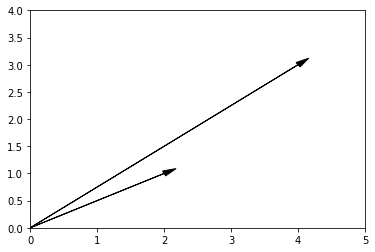

In [54]:
ax = plt.axes()
plt.xlim([0, 5])
plt.ylim([0, 4])

ax.arrow(0, 0, a[0], a[1], head_width=.1, head_length=.2, fc='k', ec='k')
ax.arrow(0, 0, b[0], b[1], head_width=.1, head_length=.2, fc='k', ec='k')

plt.show()

In [56]:
def cosine(a, b):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    a_length = np.linalg.norm(a)
    b_length = np.linalg.norm(b)
    
    return np.dot(a, b) / (a_length * b_length)

In [59]:
# длины векторов можно было считать и так

a_length = np.sqrt((a ** 2).sum())
b_length = np.sqrt((b ** 2).sum())

In [60]:
cosine(a, b)

0.9838699100999074

In [62]:
# Угол между векторами в радианах

np.arccos(cosine(a, b))

0.17985349979247847

In [64]:
# угол между векторами в градусах

np.arccos(cosine(a, b)) * 360 / (2 * np.pi)

10.304846468766044

### Упражнение

Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

In [67]:
from IPython.display import Image
# Image("user_matrix.JPG")

Матрица в виде numpy array

In [69]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

На сайт заходит очередной посетитель, о покупках которого известно следующее:

In [71]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Посчитайте косинусное расстояние между этим пользователем и всеми пользователями из массива user_stats

### Перемножение матриц

**Определение**

Пусть даны две матрицы a и b размером l x m и m x n соответственно. l - количество строк, n - количество столбцов.

\begin{equation*}
\LARGE
a = 
\begin{bmatrix}
    a_{11} & a_{12} \dots a_{1m} \\
    a_{21} & a_{22} \dots a_{2m} \\
    \vdots & \vdots \dots \vdots \\
    a_{l1} & a_{l2} \dots a_{lm}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
b = 
\begin{bmatrix}
    b_{11} & b_{12} \dots b_{1n} \\
    b_{21} & b_{22} \dots b_{2n} \\
    \vdots & \vdots \dots \vdots \\
    b_{m1} & b_{m2} \dots b_{mn}
\end{bmatrix}
\end{equation*}

Тогда произведением матриц a и b будет матрица c размерностью l x n:

\begin{equation*}
\LARGE
c = 
\begin{bmatrix}
    c_{11} & c_{12} \dots c_{1n} \\
    c_{21} & c_{22} \dots c_{2n} \\
    \vdots & \vdots \dots \vdots \\
    c_{l1} & c_{l2} \dots c_{ln}
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\LARGE
c_{ij} = \sum_{k=1}^m a_{ik} b_{kj}
\end{equation*}

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/1f96c71f0a99eac3ee872e7baf22e84324d7b4c9' style="width: 80%"></img>

In [74]:
next_user_stats.shape

(6,)

In [85]:
cosine(users_stats[7], next_user_stats)

0.9486832980505138

In [108]:
my_list = []
for i in range(10):
    my_list.append(round(np.arccos(cosine(users_stats[i], next_user_stats)) * 360 / (2 * np.pi), 2))
    print(f'Пользователь номер {i+1}', round(np.arccos(cosine(users_stats[i], next_user_stats)) * 360 / (2 * np.pi), 2))

Пользователь номер 1 78.46
Пользователь номер 2 32.31
Пользователь номер 3 66.42
Пользователь номер 4 37.76
Пользователь номер 5 66.42
Пользователь номер 6 90.0
Пользователь номер 7 90.0
Пользователь номер 8 18.43
Пользователь номер 9 90.0
Пользователь номер 10 90.0


In [109]:
sorted(my_list)

[18.43, 32.31, 37.76, 66.42, 66.42, 78.46, 90.0, 90.0, 90.0, 90.0]

In [110]:
a = [
    [1, 2],
    [3, 4]
]
b = [
    [5, 6],
    [7, 8]
]

In [112]:
np.dot(a, b)

array([[19, 22],
       [43, 50]])

В numpy есть специальный тип matrix, который отличается от ndarray

In [115]:
a_matrix = np.matrix([[1, 2], [3, 4]])
b_matrix = np.matrix([[5, 6], [7, 8]])

In [116]:
a_matrix * b_matrix

matrix([[19, 22],
        [43, 50]])

# Линейные уравнения

Дана система линейных уравнений

\begin{equation*}
\LARGE
x + 3*y = 9 \\
\LARGE
2*x - 4*y = 8
\end{equation*}